        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
(442, 11)
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  

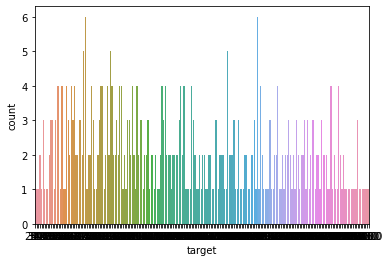

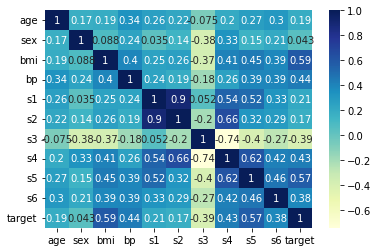

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load the dataset from scikit-learn
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

# Convert the dataset into a Pandas DataFrame
df = pd.DataFrame(np.c_[diabetes['data'], diabetes['target']], columns=diabetes['feature_names'] + ['target'])

# Check the first few rows of the DataFrame
print(df.head())

# Check the shape of the DataFrame
print(df.shape)

# Check if there are any missing values in the dataset
print(df.isnull().sum())

# Check the statistical summary of the dataset
print(df.describe())

# Check the distribution of the target variable
sns.countplot(x='target', data=df)
plt.show()

# Check the correlation between the variables
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()



In [3]:
# Split the dataset into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the data using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
# Train a Logistic Regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Logistic Regression:')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))


Logistic Regression:
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

        39.0       0.00      0.00      0.00       0.0
        47.0       0.00      0.00      0.00       1.0
        48.0       0.00      0.00      0.00       0.0
        49.0       0.00      0.00      0.00       3.0
        51.0       0.00      0.00      0.00       0.0
        52.0       0.00      0.00      0.00       1.0
        53.0       0.00      0.00      0.00       1.0
        55.0       0.00      0.00      0.00       0.0
        57.0       0.00      0.00      0.00       1.0
        59.0       0.00      0.00      0.00       1.0
        60.0       0.00      0.00      0.00       0.0
        61.0       0.00      0.00      0.00       1.0
        63.0       0.00      0.00      0.00       0.0
        64.0       0.00      0.00      0.00       1.0
     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [5]:
# Train a Decision Tree Classifier model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Decision Tree Classifier:')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Decision Tree Classifier:
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

        43.0       0.00      0.00      0.00         0
        47.0       0.00      0.00      0.00         1
        49.0       0.00      0.00      0.00         3
        52.0       0.00      0.00      0.00         1
        53.0       0.00      0.00      0.00         1
        57.0       0.00      0.00      0.00         1
        59.0       0.00      0.00      0.00         1
        61.0       0.00      0.00      0.00         1
        63.0       0.00      0.00      0.00         0
        64.0       0.00      0.00      0.00         1
        65.0       0.00      0.00      0.00         0
        67.0       0.00      0.00      0.00         1
        68.0       0.00      0.00      0.00         1
        69.0       0.00      0.00      0.00         0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [6]:
# Train a Random Forest Classifier model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Random Forest Classifier:')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))


Random Forest Classifier:
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

        25.0       0.00      0.00      0.00       0.0
        37.0       0.00      0.00      0.00       0.0
        42.0       0.00      0.00      0.00       0.0
        47.0       0.00      0.00      0.00       1.0
        49.0       0.00      0.00      0.00       3.0
        51.0       0.00      0.00      0.00       0.0
        52.0       0.00      0.00      0.00       1.0
        53.0       0.00      0.00      0.00       1.0
        57.0       0.00      0.00      0.00       1.0
        59.0       0.00      0.00      0.00       1.0
        60.0       0.00      0.00      0.00       0.0
        61.0       0.00      0.00      0.00       1.0
        63.0       0.00      0.00      0.00       0.0
        64.0       0.00      0.00      0.00       1.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [7]:
# Train a Support Vector Machine model
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Support Vector Machine:')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Support Vector Machine:
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

        47.0       0.00      0.00      0.00         1
        49.0       0.00      0.00      0.00         3
        52.0       0.00      0.00      0.00         1
        53.0       0.00      0.00      0.00         1
        57.0       0.00      0.00      0.00         1
        59.0       0.00      0.00      0.00         1
        61.0       0.00      0.00      0.00         1
        64.0       0.00      0.00      0.00         1
        67.0       0.00      0.00      0.00         1
        68.0       0.00      0.00      0.00         1
        71.0       0.00      0.00      0.00         0
        72.0       0.00      0.00      0.00         0
        74.0       0.00      0.00      0.00         1
        75.0       0.00      0.00      0.00         1
  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1